<a href="https://colab.research.google.com/github/Rustydinoco/ML_Learning/blob/master/Simple_Neural_Network_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [40]:

# Create a Model Class that inherit nn.Module

class Model(nn.Module):
# Input Layer = 4
# First Hidden Layer h1 = 6
# Second Hidden Layer h2 = 8
# output Layer = 3
  def __init__(self, in_features=4, h1=6, h2=8, out_features=3):
    super().__init__()
    self.fc1= nn.Linear(in_features, h1)
    self.fc2= nn.Linear(h1, h2)
    self.fc3= nn.Linear(h2, out_features)

# Activation the Linear with ReLU function
  def forward (self , x):
    x= F.relu(self.fc1(x))
    x= F.relu(self.fc2(x))
    x= self.fc3(x)
    return x



In [41]:
# Pick a Manual Seed for Randomizatibn
torch.manual_seed(41)
# Create an instance of Model
model= Model()

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [43]:
# Load Dataset
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
df = pd.read_csv(url)

In [44]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [45]:
# Replace Column species to Int
df['species']=df['species'].replace('setosa', 0.0)
df['species']=df['species'].replace('versicolor', 1.0)
df['species']=df['species'].replace('virginica', 2.0)

<ipython-input-45-59d610dec084>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['species']=df['species'].replace('virginica', 2.0)


In [46]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [47]:
# Train Test Split
X = df.drop('species', axis= 1)
y = df['species']

In [48]:
# Convert These To Numpy Array
X = X.values
y = y.values

In [49]:
import sklearn.model_selection
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2, random_state=41)

In [50]:
# Convert X features to Float Tensor
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [51]:
# Convert y features to Long Tensor
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)


In [52]:
# Set Criterion of the model to measure the error, how far off the the prediction are from the data
criterion = nn.CrossEntropyLoss() #https://medium.com/swlh/cross-entropy-loss-in-pytorch-c010faf97bab

# Choose Optimizer
# Using Adam Optimizer, lr = Learning Rate (if error doesnt go down after a bunch of iteration (epochs), lower the learning rate)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01) #https://www.codecademy.com/resources/docs/pytorch/optimizers/adam

In [53]:
# Train The Model
epochs = 100
losses = []

for i in range(epochs):
  # Go forward and get the prediction
  y_pred = model.forward(X_train) # Get predicted result

  # Measure the loss/error, gonna be high at first
  loss = criterion(y_pred, y_train) # Predicted values vs the y_train

  # keep Track of the losses
  losses.append(loss.detach().numpy())

  # Print every ten epochs
  if i % 10 == 0 :
    print(f'Epochs : {1} and loss : {loss}')

  # Do some propagation: take the eror rate of forward propagation and feed it back
  # thru the netwqork and fine tune the weights.
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


Epochs : 1 and loss : 1.1321529150009155
Epochs : 1 and loss : 0.9178270697593689
Epochs : 1 and loss : 0.6642837524414062
Epochs : 1 and loss : 0.45600810647010803
Epochs : 1 and loss : 0.37075573205947876
Epochs : 1 and loss : 0.2942723035812378
Epochs : 1 and loss : 0.19504274427890778
Epochs : 1 and loss : 0.10677831619977951
Epochs : 1 and loss : 0.06605347990989685
Epochs : 1 and loss : 0.04861659184098244


Text(0.5, 0, 'Epochs')

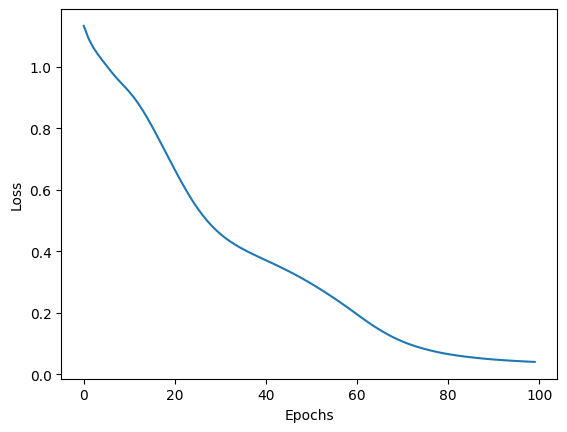

In [54]:
# Graph it
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('Epochs')

In [55]:
# Evaluate Motest on Test Data Set (Validate model on test set)
with torch.no_grad(): #Basically Turn Off back propagation
  y_eval = model.forward(X_test) # X_test are features from our test set, y_eval will be predictions
  loss = criterion(y_eval, y_test) # Find the loss or error

In [56]:
loss

tensor(0.1371)

In [63]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)

    if y_test[i] == 0:
      x = 'setosa'
    elif y_test[i] == 1:
      x = 'versicolor'
    else :
      x = 'virginica'

    # will tell us what type of flower
    print(f'{i+1}.) {str(y_val)} \t {x} \t { y_val.argmax().item()}')

    # correct or incorrect
    if y_val.argmax().item() == y_test[i]:
      correct +=1

print(f'we got {correct} correct')

1.) tensor([-5.1680,  1.6015,  4.7072]) 	 virginica 	 2
2.) tensor([-6.7838,  0.4819,  7.1160]) 	 virginica 	 2
3.) tensor([-7.1639,  1.0403,  7.1970]) 	 virginica 	 2
4.) tensor([-2.8449,  4.5175,  0.6036]) 	 versicolor 	 1
5.) tensor([-6.0928,  1.6190,  5.7130]) 	 virginica 	 2
6.) tensor([-1.1087,  5.8234, -1.9934]) 	 versicolor 	 1
7.) tensor([-4.7499,  2.6436,  3.6932]) 	 virginica 	 2
8.) tensor([-2.6992,  4.8744,  0.2536]) 	 versicolor 	 1
9.) tensor([-5.4084,  2.1824,  4.6617]) 	 virginica 	 2
10.) tensor([-7.1703,  0.4873,  7.5401]) 	 virginica 	 2
11.) tensor([-4.5741,  2.7738,  3.4309]) 	 virginica 	 2
12.) tensor([ 11.7388,   3.9839, -17.2591]) 	 setosa 	 0
13.) tensor([ 10.6037,   3.5646, -15.6112]) 	 setosa 	 0
14.) tensor([-0.1356,  5.3908, -2.8236]) 	 versicolor 	 1
15.) tensor([  9.8292,   4.4269, -15.0215]) 	 setosa 	 0
16.) tensor([-4.3664,  2.8405,  3.1671]) 	 virginica 	 2
17.) tensor([ 10.3665,   3.9318, -15.4717]) 	 setosa 	 0
18.) tensor([-5.0378,  1.9165,  4.39